<a href="https://colab.research.google.com/github/MURALAAYYAPPA/Deep-Learning/blob/main/NN_MCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import dataset
num_words = 10000
(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=num_words)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#multi_hot_encoding of words
def vectorize(seqs,dim=num_words):
    res= np.zeros((len(seqs),dim),dtype="float32")
    for i ,seq in enumerate(seqs):
        res[i,seq]=1.0
    return res
x_train=vectorize(x_train)
x_test=vectorize(x_test)

In [ ]:
#one_hot_encoding of words
y_train_oh=to_categorical(y_train)
y_test_oh=to_categorical(y_test)

In [ ]:
#model the network
model=keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(num_words,)),
    layers.Dense(64,activation='relu'),
    layers.Dense(46,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#train and evaluate the model
history=model.fit(x_train,y_train_oh,epochs=10,batch_size=512,validation_split=0.15)
test_loss,test_acc=model.evaluate(x_test,y_test_oh)
print(f"test accuracy:{test_acc}")
print(f"test loss:{test_loss}")

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.2735 - loss: 3.6053 - val_accuracy: 0.5660 - val_loss: 2.7076
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.6161 - loss: 2.3509 - val_accuracy: 0.6662 - val_loss: 1.8150
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6988 - loss: 1.5157 - val_accuracy: 0.7099 - val_loss: 1.3927
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7614 - loss: 1.1189 - val_accuracy: 0.7315 - val_loss: 1.2164
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8110 - loss: 0.8765 - val_accuracy: 0.7611 - val_loss: 1.1137
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8640 - loss: 0.6795 - val_accuracy: 0.7656 - val_loss: 1.0551
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.8938 - loss: 0.5308 - val_accuracy: 0.7804 - val_loss: 1.0018
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9156 - loss: 0.4406 - val_accuracy: 0.7923 - 

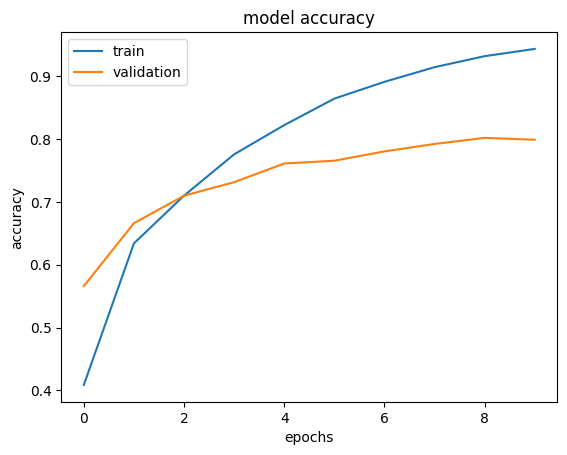

In [ ]:
#plot the graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.savefig('model accuracy.jpg')
plt.show()